In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
import matplotlib.dates as mdates

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.show_dimensions = True

In [6]:
# ph = r".\testfile\pdtestdata.csv"
ph = r".\testfile\mc03test.csv"
dt = pd.read_csv(ph,index_col=0)
dt.sort_index(ascending=True,inplace=True)
dt['day'] = dt.index.map(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
dt.head(1)
dt.shape

PmSetupId  ProductionOrder BinCode  SubstrateSessionId  \
StartDateTime                                                                 
2021-11-10 00:09:48  CN-100342          1992660      01             37368.0   

                     PmTrayId     PmRefId               PmRefCalibDate  \
StartDateTime                                                            
2021-11-10 00:09:48        67  3330202905  2021-06-15 00:00:00.0000000   

                           PmPlaus1Id        PmPlaus2Id  RhTRef1Id  RhTRef2Id  \
StartDateTime                                                                   
2021-11-10 00:09:48  3863BD1B897A85D5  25597FB80B649433   91597550   91597086   

                     RhTAtmId  RhTSagId  AtmHeatingDeviceCurrent  VoltageIn  \
StartDateTime                                                                 
2021-11-10 00:09:48  91548974  91554540                    133.0   0.521151   

                     VoltageSclTx  VoltageSdaRx  VoltageIfSelect  VoltageBoot  \
StartDateTime                                                                   
2021-11-10 00:09:48      0.801206      0.792436         0.800062     0.789385   

                     VoltageShieldTest  DutFirmwareMajorVersion  \
StartDateTime                                                     
2021-11-10 00:09:48           0.013378                      1.0   

                     DutFirmwareMinorVersion DeleteSuccessful  \
StartDateTime                                                   
2021-11-10 00:09:48                     15.0             True   

                    DeleteCalibrationSuccessful       ProductionDate  \
StartDateTime                                                          
2021-11-10 00:09:48                        True  11/10/2021 00:00:00   

                    ProductionDateIsPass ProductionDateIsWritten  \
StartDateTime                                                      
2021-11-10 00:09:48                 True                    True   

                     NumberOfDuts          DeviceId  DeviceIdInternal  \
StartDateTime                                                           
2021-11-10 00:09:48          58.0  2AB80839D91D9C90      3.078219e+18   

                                       MicrocontrollerId  ReadLmCalibBin  \
StartDateTime                                                              
2021-11-10 00:09:48  30-31-47-0A-32-38-34-33-19-00-4E-00             1.0   

                     ReadPmCalibBin ReadAllBinsGoodQualityIndicator  \
StartDateTime                                                         
2021-11-10 00:09:48           127.0                           False   

                     AutoCleaningInterval_Reset  SetTargetFanSpeed  \
StartDateTime                                                        
2021-11-10 00:09:48                         0.0             5000.0   

                     SetUpdateInterval  SetPeakThreshold  \
StartDateTime                                              
2021-11-10 00:09:48             1000.0              28.0   

                     SetPeakClippingLimit  SetLaserSetPoint  \
StartDateTime                                                 
2021-11-10 00:09:48                4096.0             115.0   

                     SetNoiseSuppression  PhotoTicksLaserOff  \
StartDateTime                                                  
2021-11-10 00:09:48                  5.0              1853.0   

                     PhotoTicksLaserOn  PhotoTicksDiff  \
StartDateTime                                            
2021-11-10 00:09:48             1870.0            17.0   

                     ZeroInterceptPM2p5NumbConcRef_1  \
StartDateTime                                          
2021-11-10 00:09:48                      2069.508545   

                     ZeroInterceptPM2p5MeanPartMassRef_1  \
StartDateTime                                              
2021-11-10 00:09:48                             0.354474   

                     ZeroInterceptPM10p0NumbConcRef

(511, 222)

# Plotting

## DataFrame.plot

In [ ]:
dp = dt[dt['Omega'].notna()][['Omega','VoltageIn','GainKclNc_2p5','FacilityNr','day','week',"ZeroInterceptPM2p5NumbConcRef_1","ZeroInterceptPM2p5NumbConcRef_2"]].head(50)
dp['time'] = pd.to_datetime(dp.index)
dp.head()

In [13]:
dp['day'].unique()

array(['2021-11-10'], dtype=object)

Omega               AxesSubplot(0.125,0.536818;0.352273x0.343182)
VoltageIn        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
GainKclNc_2p5          AxesSubplot(0.125,0.125;0.352273x0.343182)
Length: 3, dtype: object

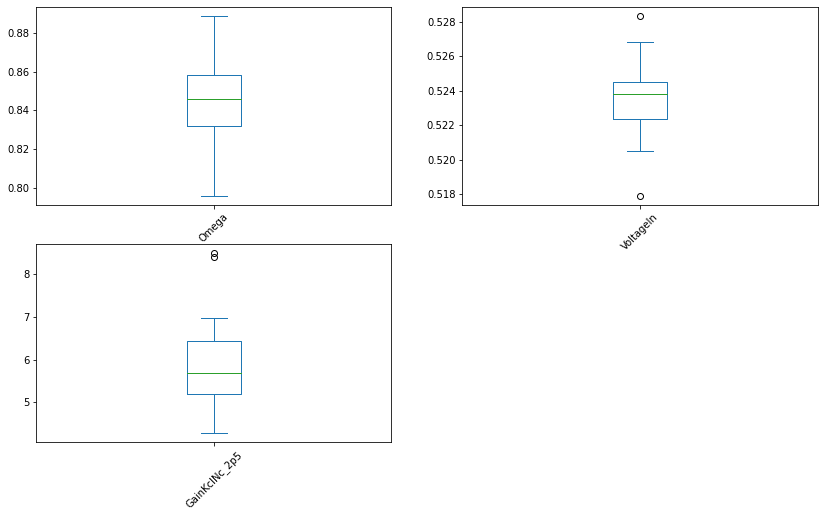

In [15]:
dp.plot(figsize=(14,8),
        subplots=True,
        x='time',
        y=['Omega','VoltageIn','GainKclNc_2p5'],
        kind='box',
        layout=(2,2),
        sharex=False,
        rot=45,
       )

<AxesSubplot:title={'center':'Correlation'}, xlabel='ZeroInterceptPM2p5NumbConcRef_1'>

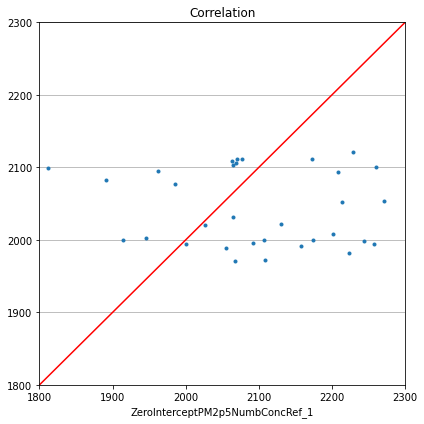

In [42]:
dp.plot(figsize=(6,6),
        # subplots=True,
        x="ZeroInterceptPM2p5NumbConcRef_1",
        y=["ZeroInterceptPM2p5NumbConcRef_2"],
        kind='line',
        # layout=(2,2),
        sharex=False,
        # rot=45,
        style='.',
        xlim=(1800,2300),
        ylim=(1800,2300),
        title="Correlation",
        legend=False,
        
       )
plt.tight_layout()
plt.axline(xy1=(1800,1800),xy2=(2100,2100),c='r')
plt.grid(axis='y')

## plot.area

<AxesSubplot:xlabel='time'>

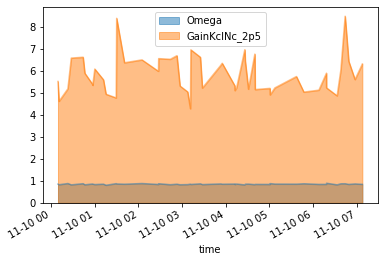

In [70]:
dp[['Omega','GainKclNc_2p5','time']].plot.area(x='time',
            # y='Omega'
            stacked=False,
            alpha=0.5
            )

<AxesSubplot:xlabel='StartDateTime'>

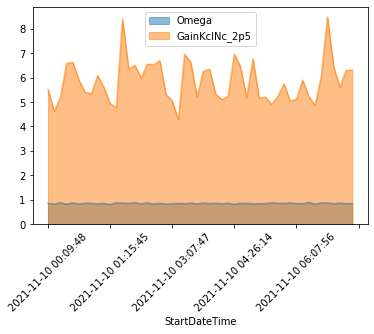

In [74]:
dp.plot.area(
            # x='time',
            y=['Omega','GainKclNc_2p5'],
            stacked=False,
            alpha=0.5,
            rot=45,
            )

## plot.bar

array([<AxesSubplot:title={'center':'Omega'}, xlabel='StartDateTime'>,
       <AxesSubplot:title={'center':'VoltageIn'}, xlabel='StartDateTime'>,
       <AxesSubplot:title={'center':'GainKclNc_2p5'}, xlabel='StartDateTime'>],
      dtype=object)

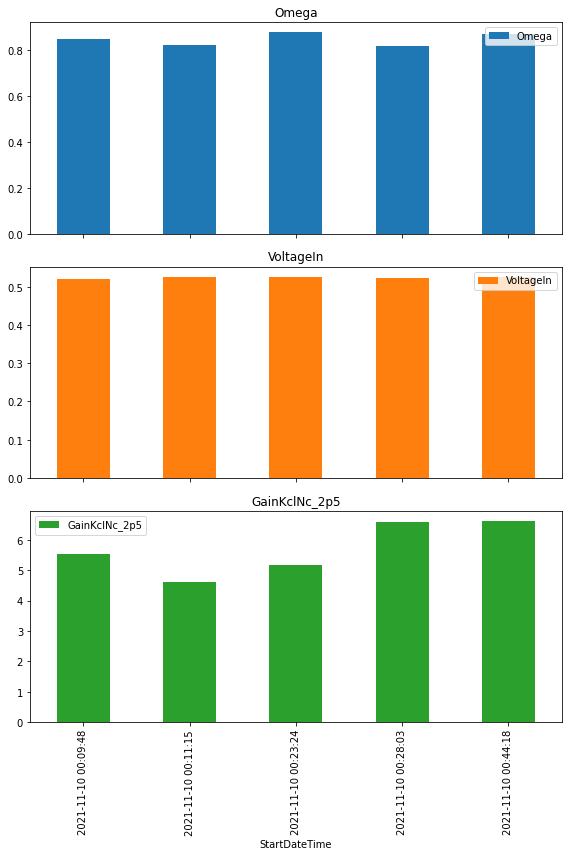

In [221]:
dbar = dp.head(5)
dbar.plot.bar(subplots=True,
              y=['Omega','VoltageIn','GainKclNc_2p5'],
              figsize=(8,12),
              # color='blue',
             )
plt.tight_layout()

In [ ]:
dbar.plot.bar(x='VoltageIn',
              y='Omega')

## plot.barh

array([<AxesSubplot:title={'center':'Omega'}, ylabel='StartDateTime'>,
       <AxesSubplot:title={'center':'VoltageIn'}, ylabel='StartDateTime'>,
       <AxesSubplot:title={'center':'GainKclNc_2p5'}, ylabel='StartDateTime'>],
      dtype=object)

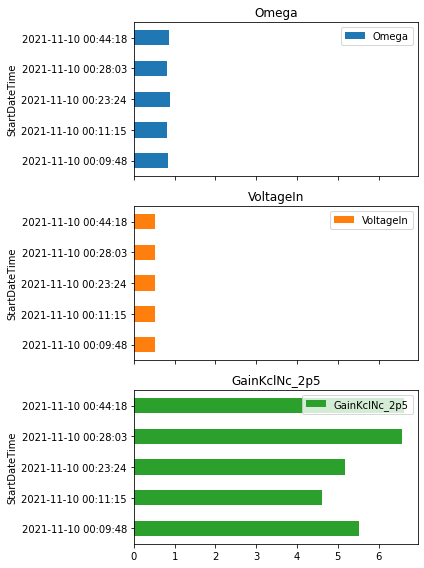

In [97]:
dbar.plot.barh(subplots=True,
              y=['Omega','VoltageIn','GainKclNc_2p5'],
               figsize=(6,8),
)
plt.tight_layout()

## plot.box

In [4]:
dbox = dt[['Omega','VoltageIn','GainKclNc_2p5','FacilityNr']].head(50)

Omega           AxesSubplot(0.125,0.536818;0.352273x0.343182)
VoltageIn    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

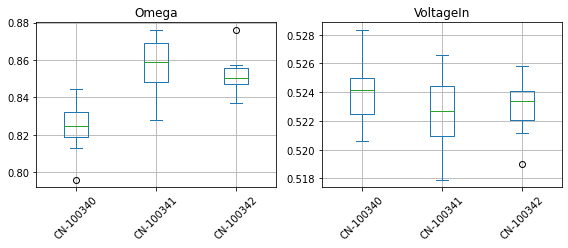

In [8]:
dbox.plot.box(subplots=True,
              y=['Omega','VoltageIn','FacilityNr'],
              by='FacilityNr',
              rot=45,
              layout=(2,2),
              figsize=(8,6),
              sharex=True,
              grid=True,
             )
plt.tight_layout()

## plot.density

In [88]:
ddsty = dt[['Omega','VoltageIn','GainKclNc_2p5','FacilityNr','day']].head(50)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

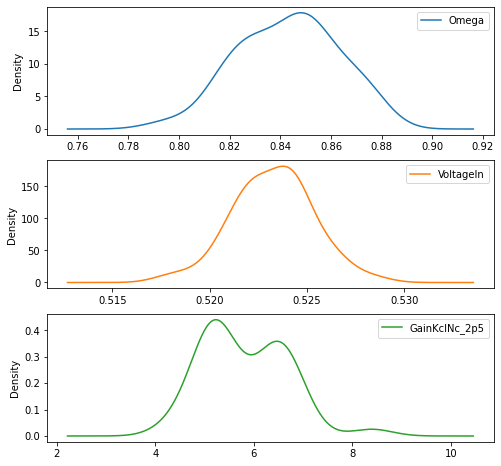

In [233]:
ddsty.plot.density(subplots=True,
                  y=['Omega','VoltageIn','GainKclNc_2p5'],
                   sharex=False,
                   bw_method = 'scott',
                   figsize=(8,8)
                   
                  )

## plot.hist

In [217]:
# dht = dt.query("FacilityNr == 'CN-100340'")
dht = dt[['ArzHyp_0',
          'ArzHyp_1',
          'ArzHyp_2',
          'ArzHyp_3',
          'ArzHyp_4',
          'ArzHyp_5',
          'FacilityNr']].head(100)
dht = dht[dht['ArzHyp_0'].notna()].reset_index(drop=True)
# dht = dht.T
# dht

<AxesSubplot:ylabel='Frequency'>

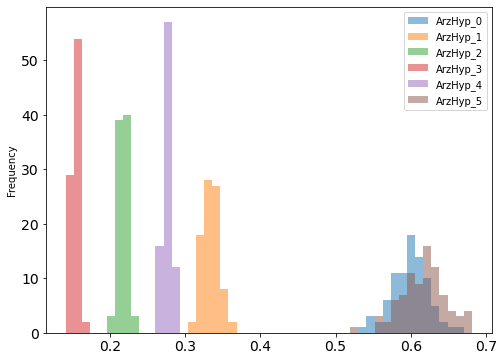

In [218]:
dht.plot.hist(fontsize=14,
              # by='FacilityNr',
             figsize=(8,6),
             # layout=(2,2),
              # subplots=True,
              bins=50,
              alpha=0.5
             )

<AxesSubplot:xlabel='ArzHyp_0', ylabel='Count'>

<AxesSubplot:xlabel='ArzHyp_0', ylabel='Count'>

<AxesSubplot:xlabel='ArzHyp_0', ylabel='Count'>

<AxesSubplot:xlabel='ArzHyp_0', ylabel='Count'>

<AxesSubplot:xlabel='ArzHyp_0', ylabel='Count'>

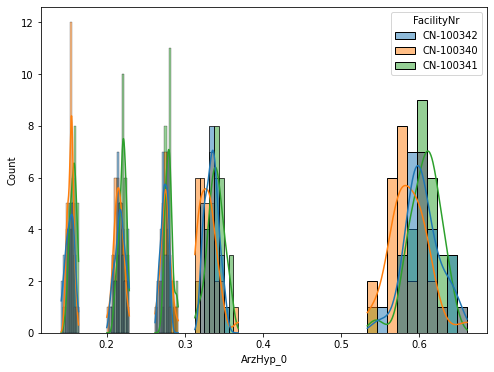

In [219]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
for col in ['ArzHyp_0','ArzHyp_1','ArzHyp_2','ArzHyp_3','ArzHyp_4']:
    sns.histplot(data=dht,
                 x=col,
                 hue='FacilityNr',
                 kde=True,
                 ax=ax
                )

## plot.kde

In [224]:
dkde = dt[['Omega','ArzHyp_0','ArzHyp_1']].head(50).dropna(how='any',axis=0)
# dkde

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

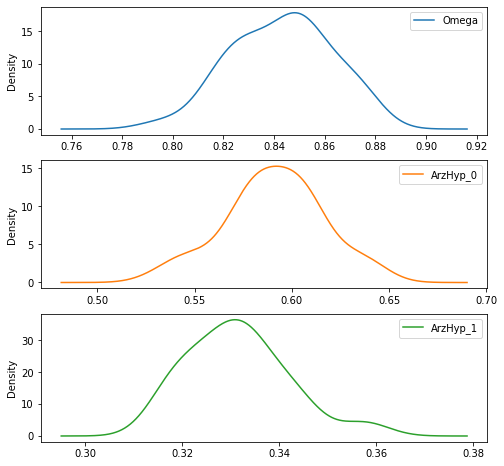

In [228]:
dkde.plot.kde(subplots=True,
              figsize=(8,8),
              sharex=False,
             )

## plot.line

In [157]:
dht = dt.query("FacilityNr == 'CN-100340'")
dht = dht[['ArzHyp_0',
          'ArzHyp_1',
          'ArzHyp_2',
          'ArzHyp_3',
          'ArzHyp_4',
          'ArzHyp_5']].head(30)
dht = dht[dht['ArzHyp_0'].notna()].reset_index(drop=True)
dht = dht.T
dht.head(1)

0         1         2         3         4         5   \
ArzHyp_0  0.545531  0.569883  0.561605  0.600683  0.533551  0.602443   

                6         7         8         9         10        11  \
ArzHyp_0  0.591869  0.583203  0.576482  0.606626  0.580667  0.569788   

                12        13        14       15        16        17        18  \
ArzHyp_0  0.576246  0.597751  0.581785  0.58167  0.571306  0.614077  0.594958   

                19        20        21        22        23        24  \
ArzHyp_0  0.559515  0.598658  0.661278  0.599102  0.604257  0.581635   

                25        26        27  
ArzHyp_0  0.623478  0.612927  0.566214

In [158]:
dhtt = dt.query("FacilityNr == 'CN-100342'")
dhtt = dt[['ArzHyp_0',
          'ArzHyp_1',
          'ArzHyp_2',
          'ArzHyp_3',
          'ArzHyp_4',
          'ArzHyp_5']].head(30)
dhtt = dhtt[dhtt['ArzHyp_0'].notna()].reset_index(drop=True)
dhtt = dhtt.T
dhtt.head(2)

0         1         2         3         4         5   \
ArzHyp_0  0.603607  0.545531  0.608584  0.569883  0.637886  0.561605   
ArzHyp_1  0.335196  0.318016  0.337547  0.316012  0.357422  0.316456   

                6         7         8         9         10        11  \
ArzHyp_0  0.605241  0.589840  0.600683  0.584185  0.533551  0.610003   
ArzHyp_1  0.323672  0.328277  0.333102  0.336802  0.320187  0.344095   

                12        13        14        15        16        17  \
ArzHyp_0  0.636652  0.602443  0.637709  0.591869  0.615664  0.583203   
ArzHyp_1  0.323593  0.345866  0.341595  0.331905  0.357841  0.332069   

                18        19        20        21  
ArzHyp_0  0.580937  0.576482  0.544819  0.549105  
ArzHyp_1  0.331763  0.325105  0.318586  0.325413

<AxesSubplot:>

<AxesSubplot:>

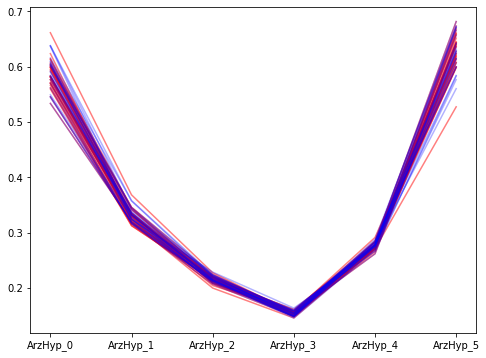

In [206]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
# cmp = mpl.colors.ListedColormap(['r','g','b','y'])
cmp = mpl.colors.ListedColormap(['red'])
cmpt = mpl.colors.ListedColormap(['blue'])
dht.plot(legend=False,
        ax=ax,
         colormap = cmp,
         alpha=0.5,
        )


dhtt.plot(legend=False,
        ax=ax,
         colormap = cmpt,
          alpha=0.3,
        )


<AxesSubplot:>

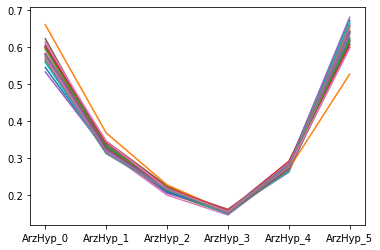

In [78]:
dht.plot.line(legend=False,)

## plot.pie

## plot.scatter

In [84]:
dt.head(1)

PmSetupId  ProductionOrder BinCode  SubstrateSessionId  \
StartDateTime                                                                 
2021-11-10 00:09:48  CN-100342          1992660      01             37368.0   

                     PmTrayId     PmRefId               PmRefCalibDate  \
StartDateTime                                                            
2021-11-10 00:09:48        67  3330202905  2021-06-15 00:00:00.0000000   

                           PmPlaus1Id        PmPlaus2Id  RhTRef1Id  RhTRef2Id  \
StartDateTime                                                                   
2021-11-10 00:09:48  3863BD1B897A85D5  25597FB80B649433   91597550   91597086   

                     RhTAtmId  RhTSagId  AtmHeatingDeviceCurrent  VoltageIn  \
StartDateTime                                                                 
2021-11-10 00:09:48  91548974  91554540                    133.0   0.521151   

                     VoltageSclTx  VoltageSdaRx  VoltageIfSelect  VoltageBoot  \
StartDateTime                                                                   
2021-11-10 00:09:48      0.801206      0.792436         0.800062     0.789385   

                     VoltageShieldTest  DutFirmwareMajorVersion  \
StartDateTime                                                     
2021-11-10 00:09:48           0.013378                      1.0   

                     DutFirmwareMinorVersion DeleteSuccessful  \
StartDateTime                                                   
2021-11-10 00:09:48                     15.0             True   

                    DeleteCalibrationSuccessful       ProductionDate  \
StartDateTime                                                          
2021-11-10 00:09:48                        True  11/10/2021 00:00:00   

                    ProductionDateIsPass ProductionDateIsWritten  \
StartDateTime                                                      
2021-11-10 00:09:48                 True                    True   

                     NumberOfDuts          DeviceId  DeviceIdInternal  \
StartDateTime                                                           
2021-11-10 00:09:48          58.0  2AB80839D91D9C90      3.078219e+18   

                                       MicrocontrollerId  ReadLmCalibBin  \
StartDateTime                                                              
2021-11-10 00:09:48  30-31-47-0A-32-38-34-33-19-00-4E-00             1.0   

                     ReadPmCalibBin ReadAllBinsGoodQualityIndicator  \
StartDateTime                                                         
2021-11-10 00:09:48           127.0                           False   

                     AutoCleaningInterval_Reset  SetTargetFanSpeed  \
StartDateTime                                                        
2021-11-10 00:09:48                         0.0             5000.0   

                     SetUpdateInterval  SetPeakThreshold  \
StartDateTime                                              
2021-11-10 00:09:48             1000.0              28.0   

                     SetPeakClippingLimit  SetLaserSetPoint  \
StartDateTime                                                 
2021-11-10 00:09:48                4096.0             115.0   

                     SetNoiseSuppression  PhotoTicksLaserOff  \
StartDateTime                                                  
2021-11-10 00:09:48                  5.0              1853.0   

                     PhotoTicksLaserOn  PhotoTicksDiff  \
StartDateTime                                            
2021-11-10 00:09:48             1870.0            17.0   

                     ZeroInterceptPM2p5NumbConcRef_1  \
StartDateTime                                          
2021-11-10 00:09:48                      2069.508545   

                     ZeroInterceptPM2p5MeanPartMassRef_1  \
StartDateTime                                              
2021-11-10 00:09:48                             0.354474   

                     ZeroInterceptPM10p0NumbConcRef

<AxesSubplot:xlabel='Omega', ylabel='GainArzMc_2p5'>

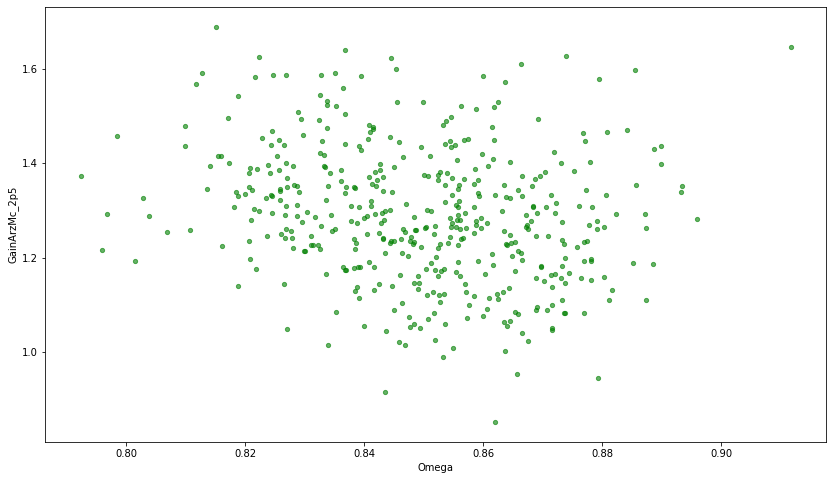

In [98]:
dt.plot.scatter(figsize=(14,8),
                x='Omega',
               y='GainArzMc_2p5',
                s=18,
                color='green',
                alpha=0.6,
               )

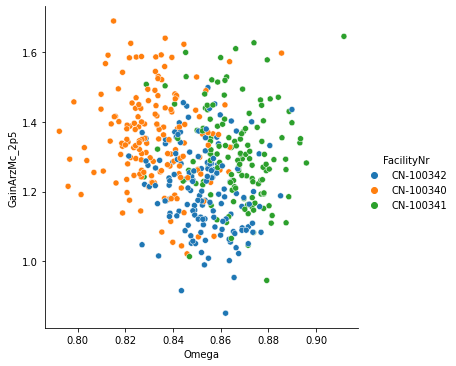

In [87]:
sns.relplot(data=dt,
            x='Omega',
           y='GainArzMc_2p5',
           hue='FacilityNr',)

# plotting
    version 1.3.3, page2609

In [41]:
import pandas.plotting as pg

In [37]:
[x for x in dir(pd.plotting) if not x.startswith("_")]

['PlotAccessor',
 'andrews_curves',
 'autocorrelation_plot',
 'bootstrap_plot',
 'boxplot',
 'boxplot_frame',
 'boxplot_frame_groupby',
 'deregister_matplotlib_converters',
 'hist_frame',
 'hist_series',
 'lag_plot',
 'parallel_coordinates',
 'plot_params',
 'radviz',
 'register_matplotlib_converters',
 'scatter_matrix',
 'table']

## plotting.table:

In [ ]:
pt = dt[['Omega','VoltageSdaRx','VoltageIn','VoltageSclTx']].head(10)

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
pt.plot(ax=ax)
pd.plotting.table(ax=ax,data=pt)

## andrews_curves: 安德鲁斯曲线

In [8]:
from pandas.plotting import andrews_curves

In [31]:
dac = dt[[col for col in dt if any(k in col for k in ['Kcl','BinCode','Arz'])]]
dac = dac.query("BinCode not in ['31','7A','F2','75','FA','6F','70','7F']")

<AxesSubplot:>

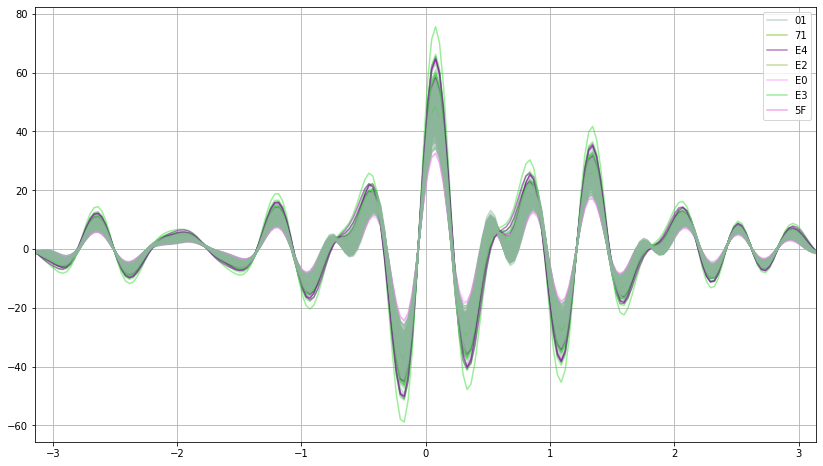

In [32]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

andrews_curves(frame=dac,class_column='BinCode',alpha=0.5)

## parallel_coordinates: 平行坐标绘图

In [33]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

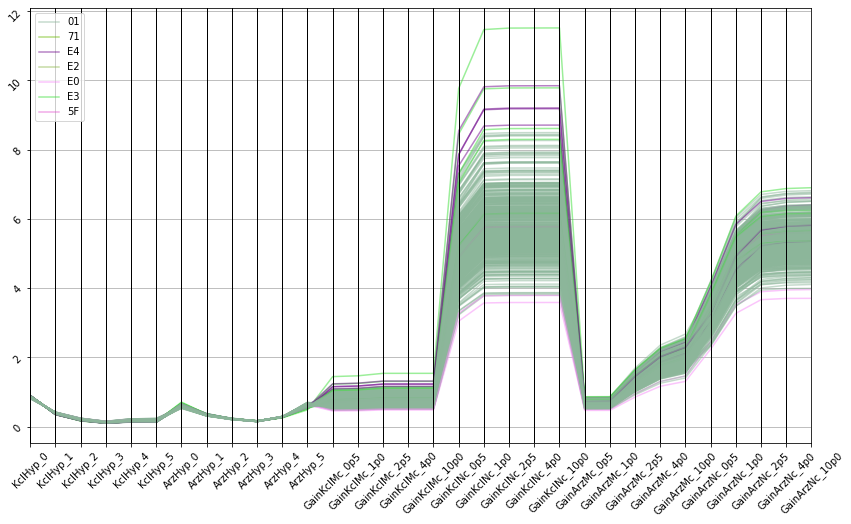

In [34]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

parallel_coordinates(frame=dac,class_column='BinCode',ax=ax,alpha=0.5)
plt.tick_params(labelrotation=45)
ax.legend(loc='upper left')

## lag_plot: 滞后图

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

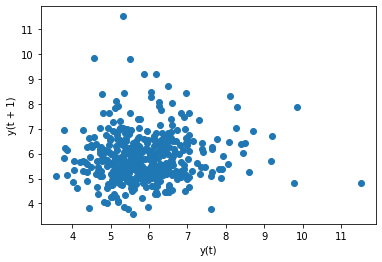

In [39]:
pg.lag_plot(dac['GainKclNc_2p5'])

## bootstrap: 引导图, 统计学中的一种重采样技术

In [40]:
dac.head(1)

BinCode  KclHyp_0  KclHyp_1  KclHyp_2  KclHyp_3  KclHyp_4  \
StartDateTime                                                                   
2021-11-10 00:09:48      01  0.864157     0.381  0.203347  0.125475  0.163047   

                     KclHyp_5  ArzHyp_0  ArzHyp_1  ArzHyp_2  ArzHyp_3  \
StartDateTime                                                           
2021-11-10 00:09:48  0.156184  0.603607  0.335196  0.218882  0.152876   

                     ArzHyp_4  ArzHyp_5  GainKclMc_0p5  GainKclMc_1p0  \
StartDateTime                                                           
2021-11-10 00:09:48  0.273383  0.614234       0.691589       0.702628   

                     GainKclMc_2p5  GainKclMc_4p0  GainKclMc_10p0  \
StartDateTime                                                       
2021-11-10 00:09:48       0.736848       0.736848        0.736848   

                     GainKclNc_0p5  GainKclNc_1p0  GainKclNc_2p5  \
StartDateTime                                                      
2021-11-10 00:09:48       4.745187       5.505662       5.519464   

                     GainKclNc_4p0  GainKclNc_10p0  GainArzMc_0p5  \
StartDateTime                                                       
2021-11-10 00:09:48       5.520915        5.521285       0.626642   

                     GainArzMc_1p0  GainArzMc_2p5  GainArzMc_4p0  \
StartDateTime                                                      
2021-11-10 00:09:48       0.628567       1.146975       1.566727   

                     GainArzMc_10p0  GainArzNc_0p5  GainArzNc_1p0  \
StartDateTime                                                       
2021-11-10 00:09:48        1.758408       3.008403        4.39268   

                     GainArzNc_2p5  GainArzNc_4p0  GainArzNc_10p0  
StartDateTime                                                      
2021-11-10 00:09:48       4.937685       4.991364        4.994543

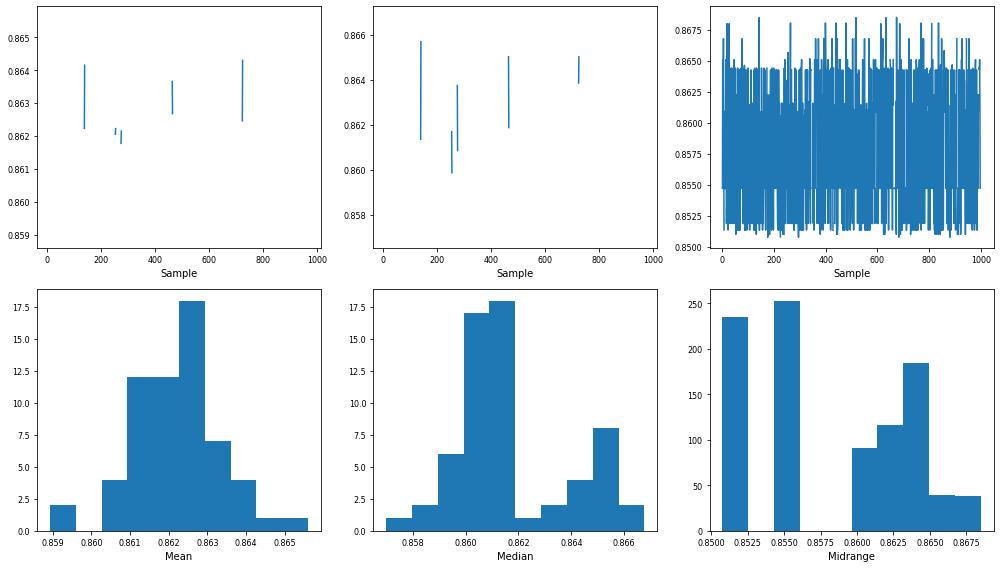

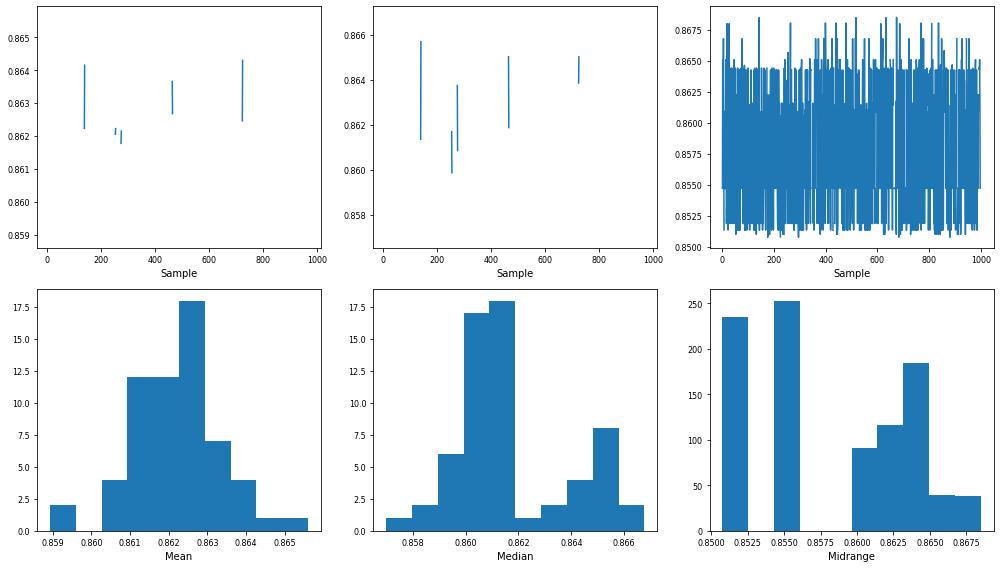

In [49]:
fig = plt.figure(figsize=(14,8))
pg.bootstrap_plot(dac["KclHyp_0"].head(100),
                  size=50,      #抽样个数
                  samples=1000,  #重抽样次数
                  fig=fig)

## RadViz:

<AxesSubplot:>

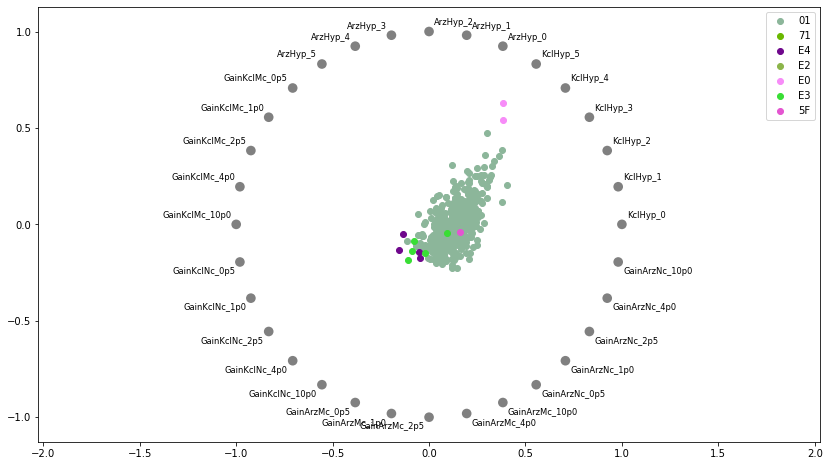

In [51]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
pg.radviz(frame=dac,
          class_column='BinCode',
         ax=ax)

# plotting_formatting:

## Suppressing tick resolution adjustment

In [94]:
dpf = dt[['TotalCounts_1','PmNormRate_1','KclHyp_0','KclHyp_5']]

<AxesSubplot:xlabel='StartDateTime'>

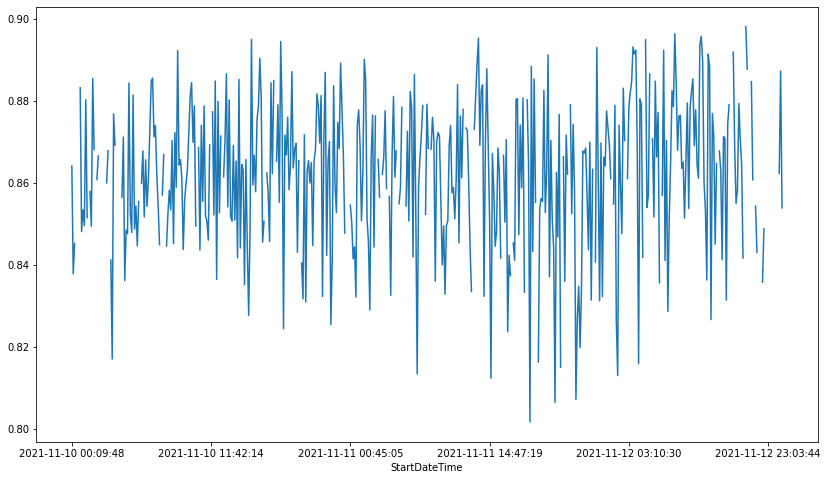

In [99]:
dpf['KclHyp_0'].plot(x_compat=True,
                     figsize=(14,8)
                    )

## Automatic date tick adjustment

In [151]:
dad = dt[['TotalCounts_1','PmNormRate_1','KclHyp_0','KclHyp_1','KclHyp_2','KclHyp_5']].dropna().head(50)

In [137]:
# import matplotlib.dates as mdates

In [138]:
#获取每日数据 
alldays = mdates.DayLocator()

<AxesSubplot:xlabel='StartDateTime'>

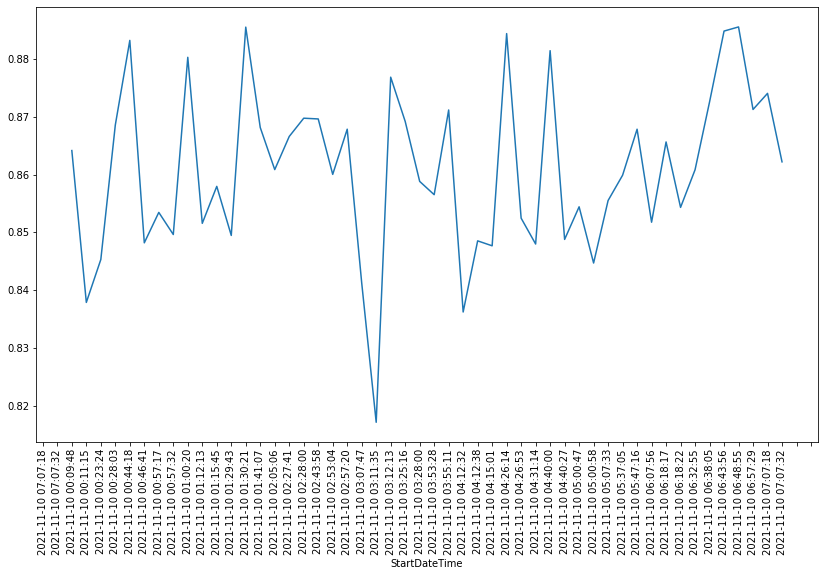

In [139]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

#设置主刻度 即长刻度线
ax.xaxis.set_major_locator(alldays)
#设置副刻度 即短刻度线
# ax.xaxis.set_minor_locator(alldays)

# monthFormatter = dates.DateFormatter('%m-%Y') # 如：2-2015
dayFormatter = mdates.DateFormatter('%d')          # 如：12
#设置主刻度格式
ax.xaxis.set_major_formatter(dayFormatter)

dad['KclHyp_0'].plot(x_compat=True,
                     ax=ax,
                     rot=90
                    )

#自动调整xtick的间距
# fig.autofmt_xdate()

## Using layout and targeting multiple axes

array([[<AxesSubplot:xlabel='StartDateTime'>,
        <AxesSubplot:xlabel='StartDateTime'>],
       [<AxesSubplot:xlabel='StartDateTime'>,
        <AxesSubplot:xlabel='StartDateTime'>],
       [<AxesSubplot:xlabel='StartDateTime'>,
        <AxesSubplot:xlabel='StartDateTime'>]], dtype=object)

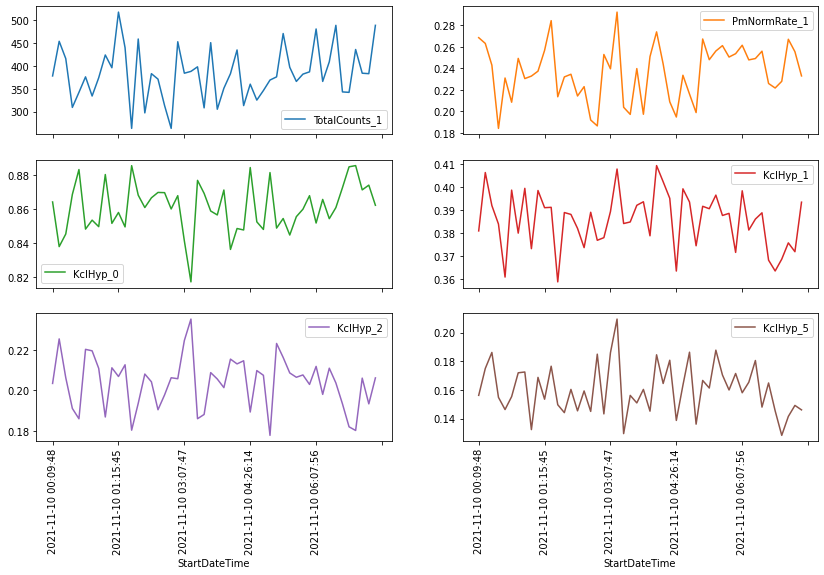

In [152]:
dad.plot(figsize=(14,8),
         subplots=True,
         layout=(-1,2),   #(rows,columns), 如果是 -1, pandas自动计算需要多少
         rot=90,
         kind='line',
         sharex=True,
        )

## plotting with tables

In [166]:
dpwt = dt[['PmNormRate_1','KclHyp_0']].dropna().head(10)

Text(0.5, 0, 'StartDateTime')

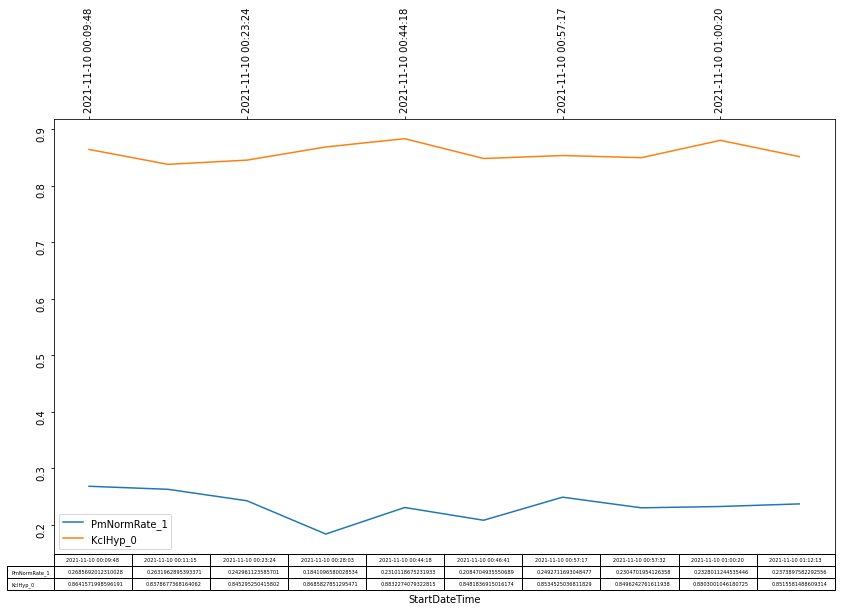

In [181]:
ax = dpwt.plot(table=True,figsize=(14,8))
ax.xaxis.tick_top()
plt.tick_params(labelrotation=90)
ax.set_xlabel(dpwt.index.name,labelpad=40)

<AxesSubplot:xlabel='StartDateTime'>

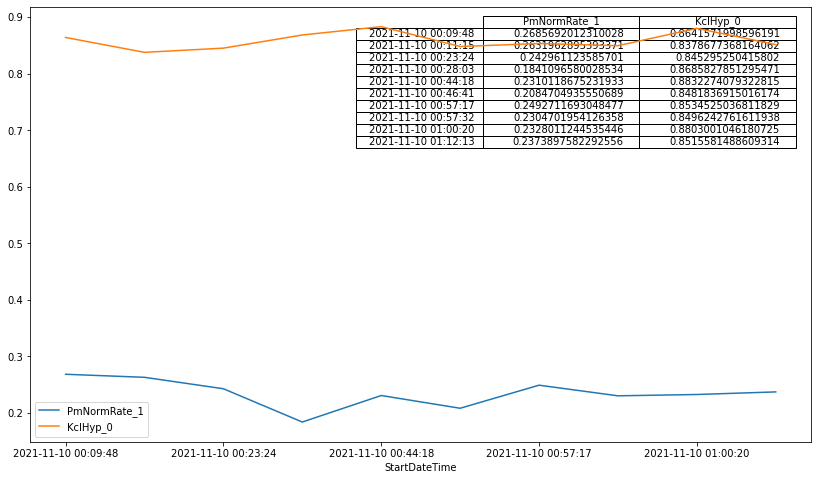

In [191]:
#pandas.plotting.table
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
pg.table(ax,dpwt,loc="upper right", colWidths=[0.2,0.2,0.2,])
dpwt.plot(ax=ax)

## colormaps:

In [9]:
# from matplotlib import cm

In [214]:
dcmp = dt[['KclHyp_1','KclHyp_2','KclHyp_3']].dropna().head(50)

<AxesSubplot:xlabel='StartDateTime'>

<AxesSubplot:xlabel='StartDateTime'>

<AxesSubplot:xlabel='StartDateTime'>

<AxesSubplot:xlabel='StartDateTime'>

<AxesSubplot:xlabel='StartDateTime'>

<AxesSubplot:xlabel='StartDateTime'>

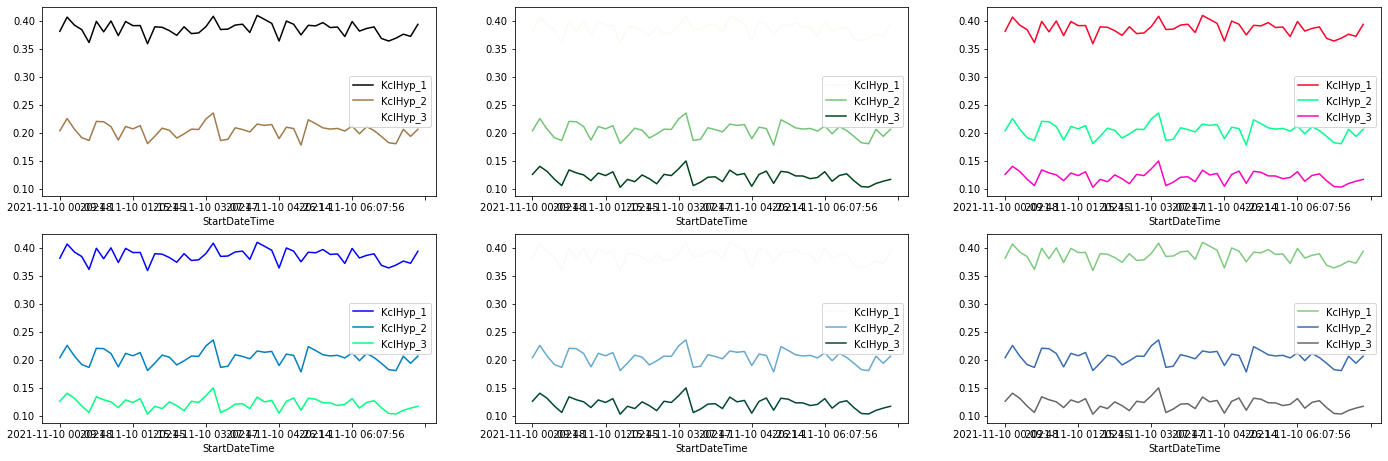

In [238]:
fig = plt.figure(figsize=(24,16))
for i,cp in enumerate(['cubehelix',"Greens","gist_rainbow","winter",'PuBuGn','Accent']):
    dcmp.plot(colormap=cp,
             ax=fig.add_subplot(4,3,i+1))
# 或替代方式 cm.cubehelix

In [228]:
# colormap有哪些颜色形式,如下:
len([x for x in dir(cm) if not x.startswith("_")])
cmps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r','Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

180

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Accent')

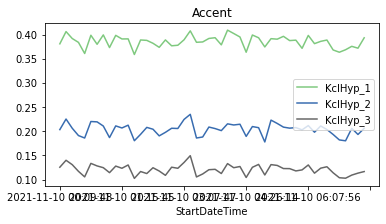

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Accent_r')

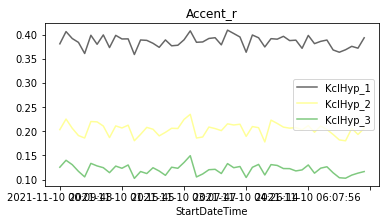

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Blues')

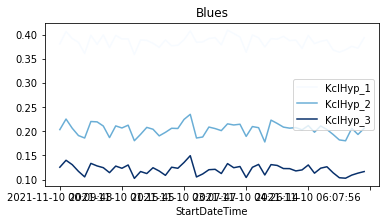

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Blues_r')

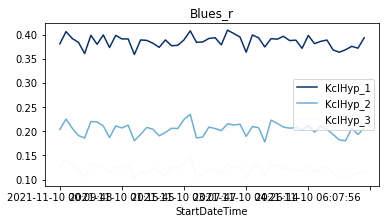

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BrBG')

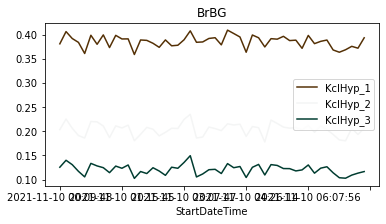

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BrBG_r')

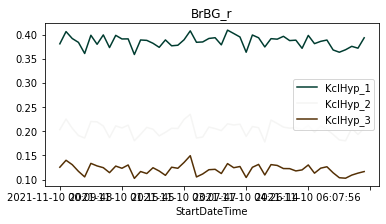

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BuGn')

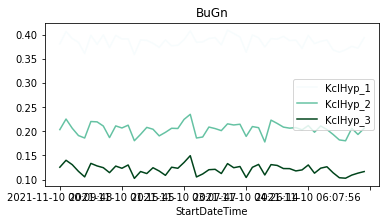

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BuGn_r')

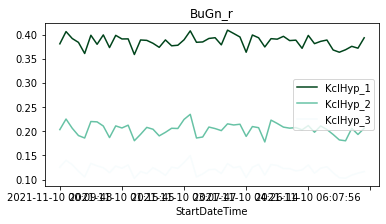

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BuPu')

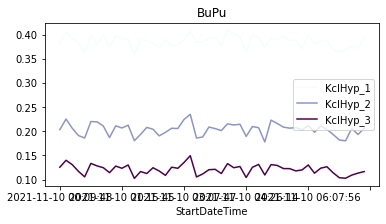

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'BuPu_r')

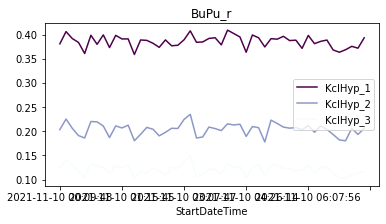

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'CMRmap')

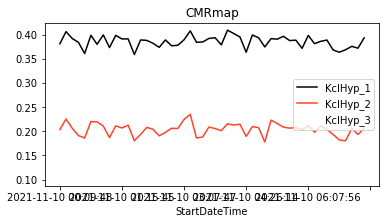

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'CMRmap_r')

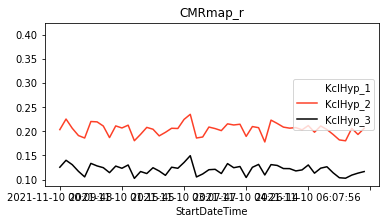

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Dark2')

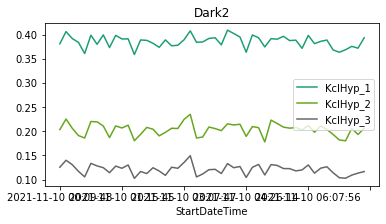

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Dark2_r')

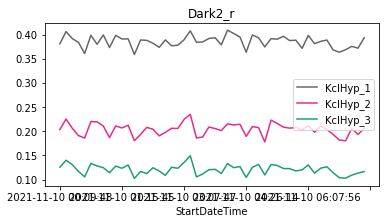

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'GnBu')

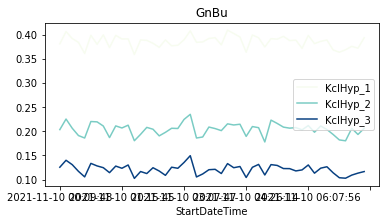

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'GnBu_r')

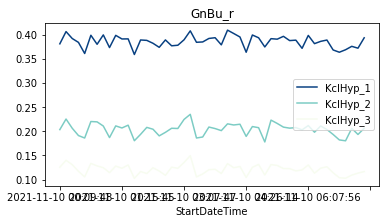

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Greens')

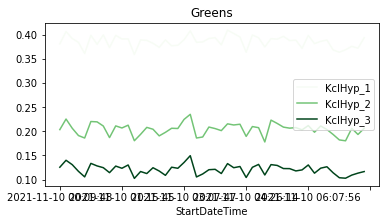

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Greens_r')

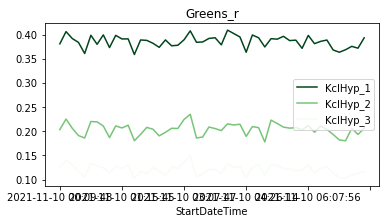

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Greys')

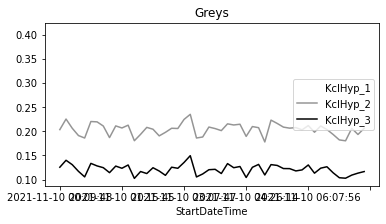

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Greys_r')

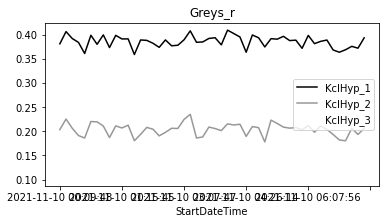

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'OrRd')

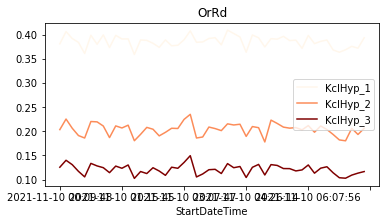

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'OrRd_r')

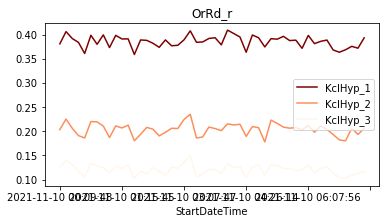

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Oranges')

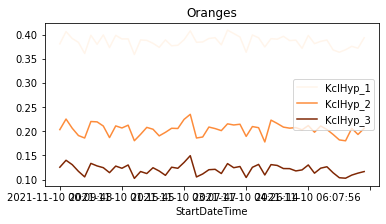

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Oranges_r')

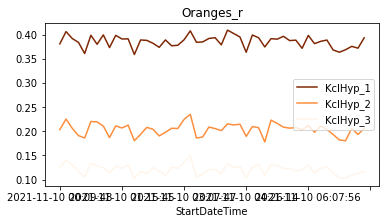

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PRGn')

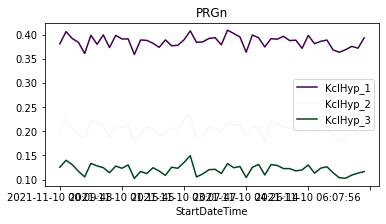

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PRGn_r')

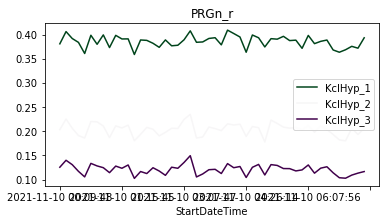

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Paired')

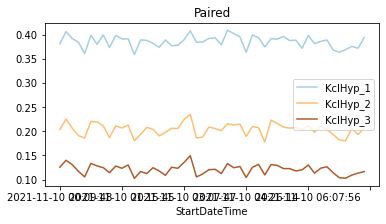

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Paired_r')

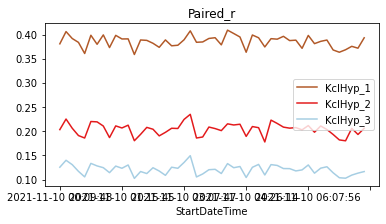

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Pastel1')

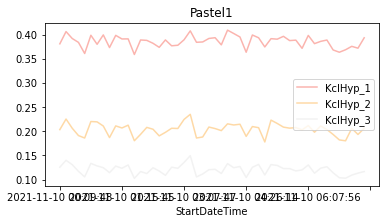

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Pastel1_r')

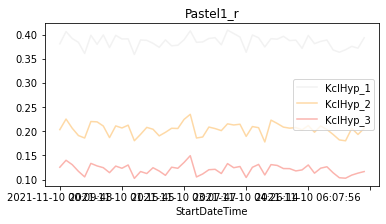

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Pastel2')

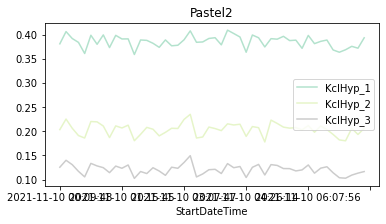

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Pastel2_r')

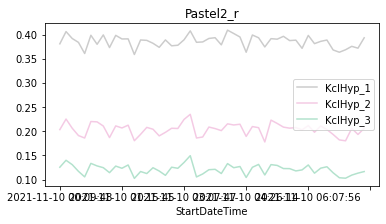

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PiYG')

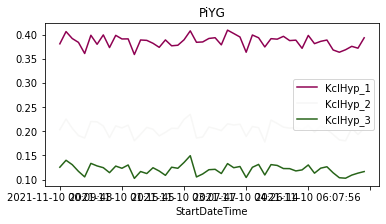

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PiYG_r')

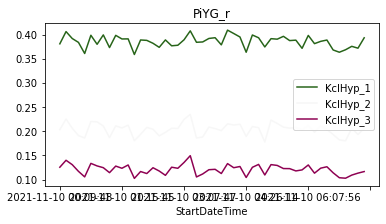

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuBu')

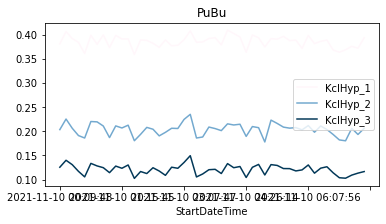

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuBuGn')

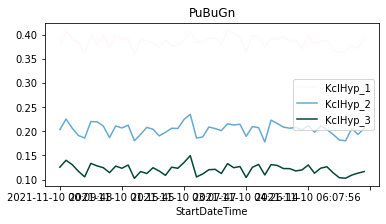

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuBuGn_r')

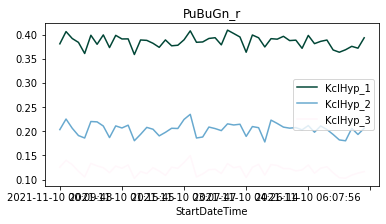

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuBu_r')

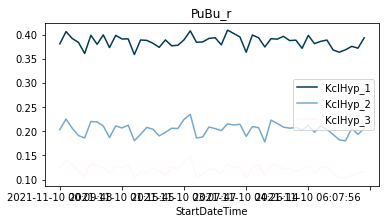

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuOr')

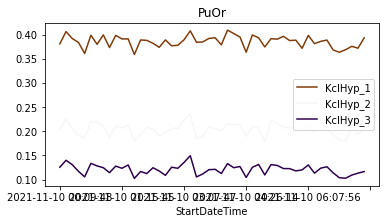

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuOr_r')

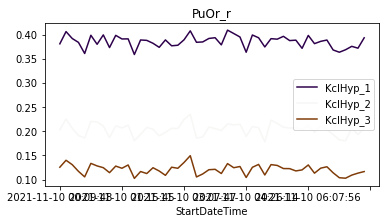

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuRd')

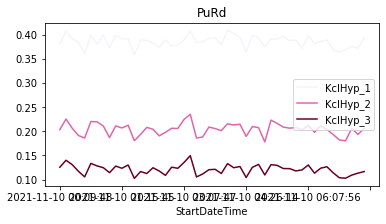

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'PuRd_r')

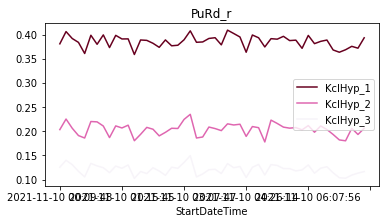

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Purples')

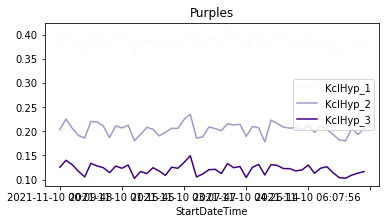

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Purples_r')

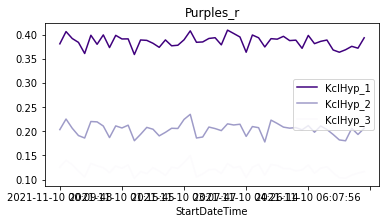

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdBu')

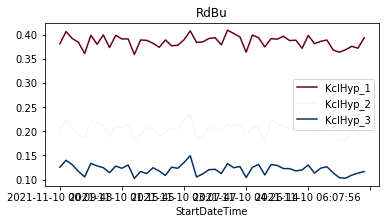

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdBu_r')

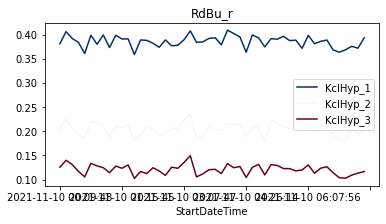

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdGy')

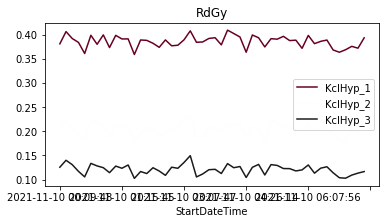

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdGy_r')

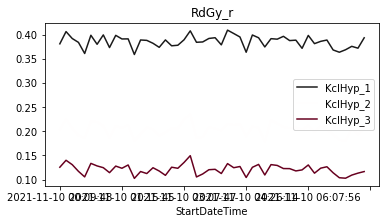

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdPu')

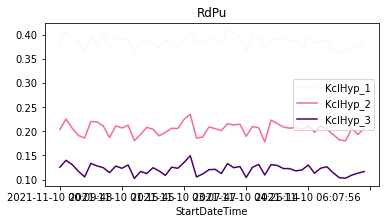

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdPu_r')

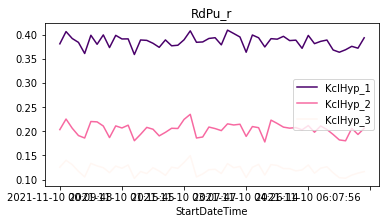

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdYlBu')

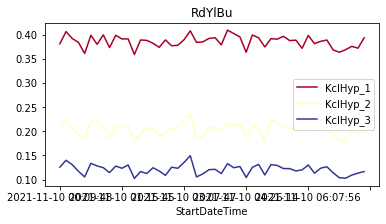

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdYlBu_r')

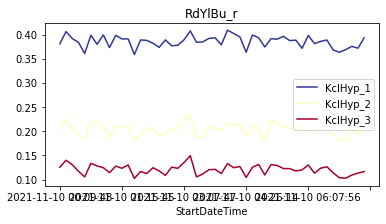

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdYlGn')

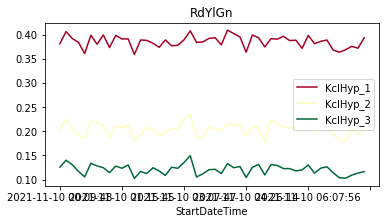

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'RdYlGn_r')

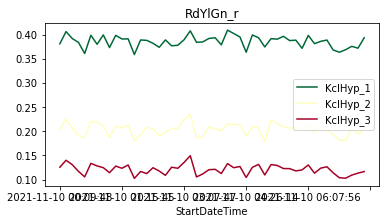

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Reds')

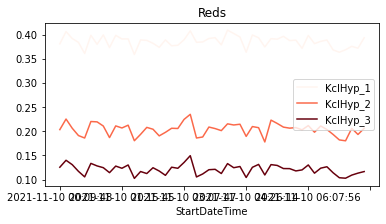

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Reds_r')

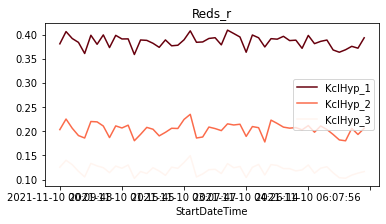

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set1')

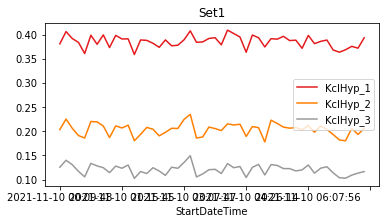

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set1_r')

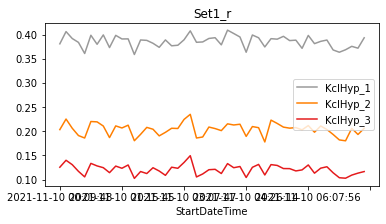

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set2')

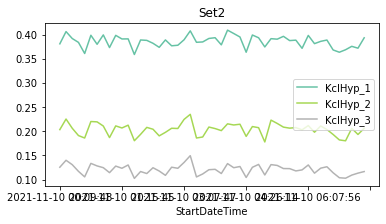

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set2_r')

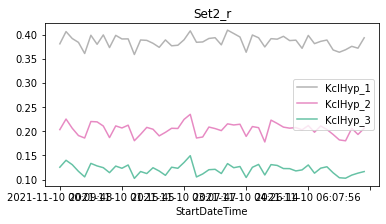

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set3')

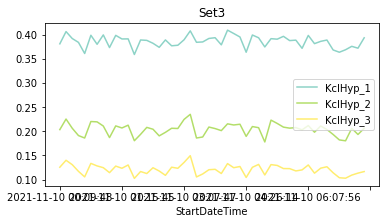

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Set3_r')

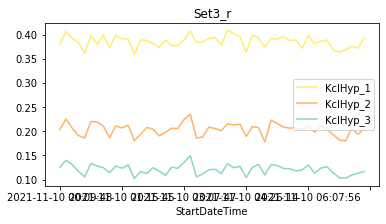

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Spectral')

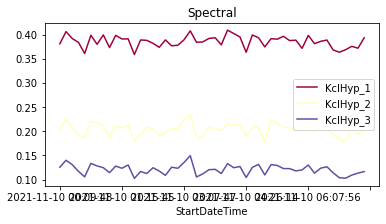

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Spectral_r')

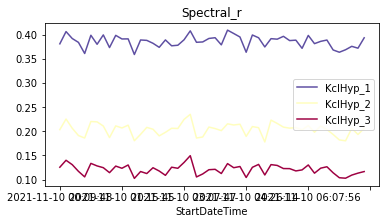

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Wistia')

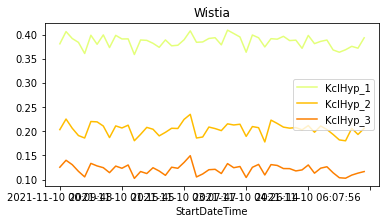

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'Wistia_r')

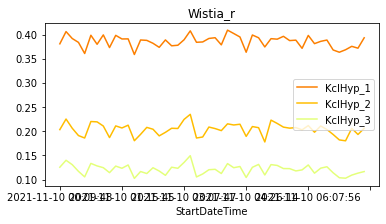

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlGn')

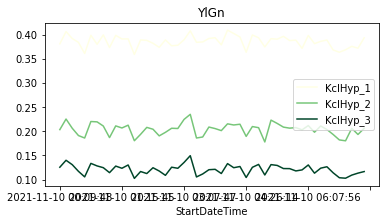

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlGnBu')

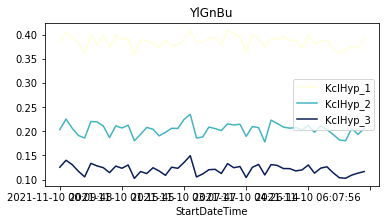

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlGnBu_r')

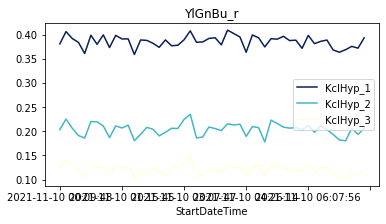

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlGn_r')

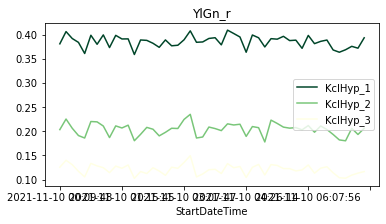

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlOrBr')

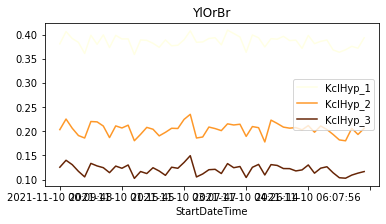

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlOrBr_r')

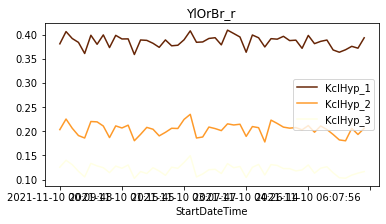

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlOrRd')

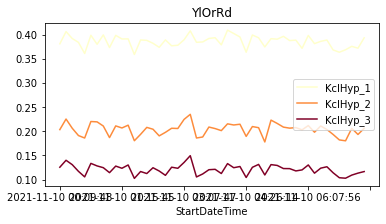

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'YlOrRd_r')

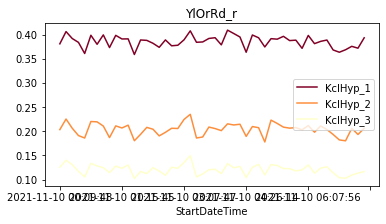

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'afmhot')

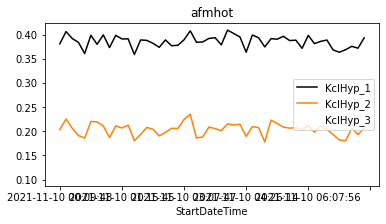

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'afmhot_r')

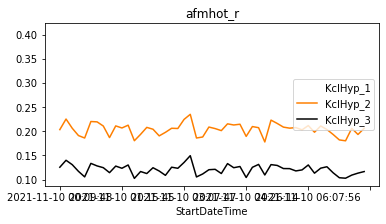

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'autumn')

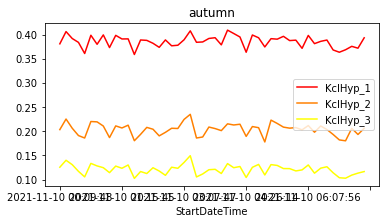

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'autumn_r')

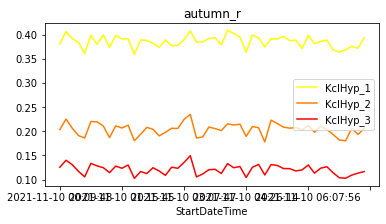

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'binary')

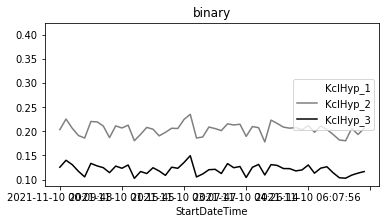

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'binary_r')

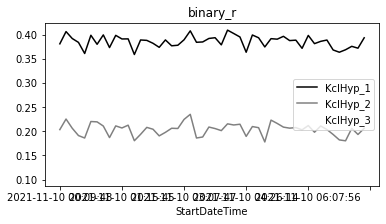

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'bone')

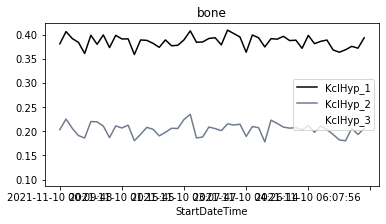

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'bone_r')

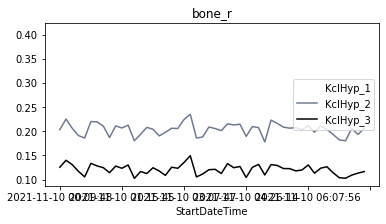

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'brg')

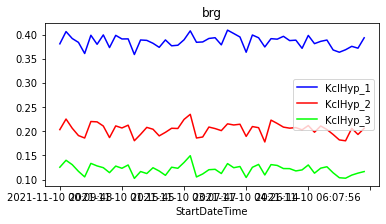

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'brg_r')

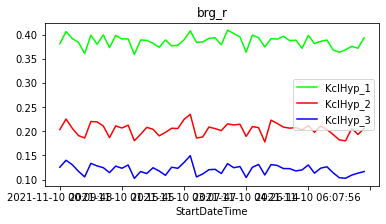

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'bwr')

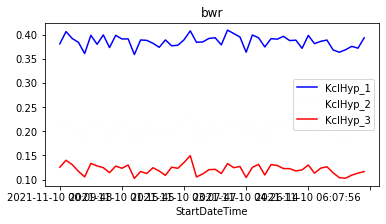

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'bwr_r')

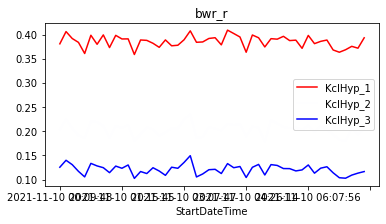

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cividis')

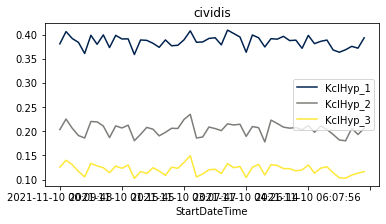

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cividis_r')

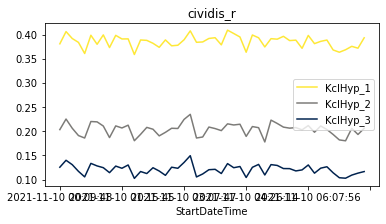

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cool')

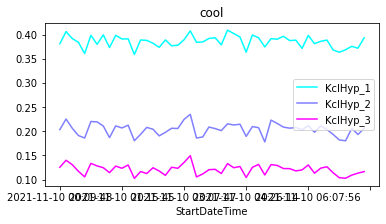

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cool_r')

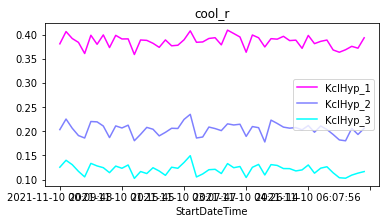

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'coolwarm')

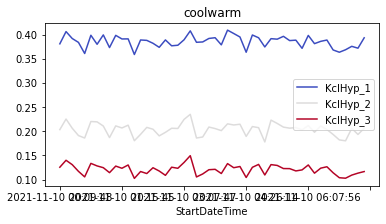

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'coolwarm_r')

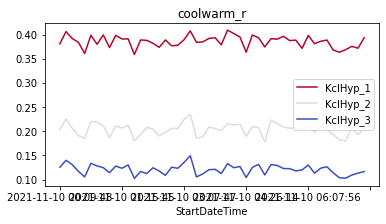

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'copper')

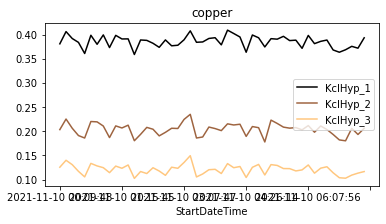

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'copper_r')

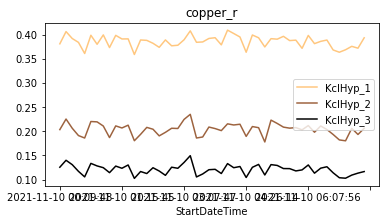

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'crest')

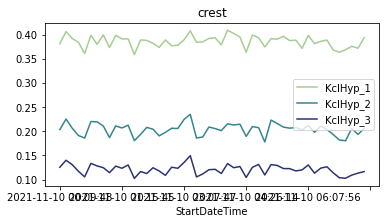

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'crest_r')

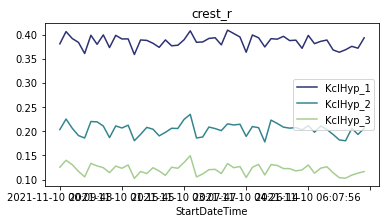

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cubehelix')

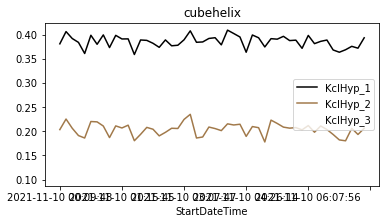

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'cubehelix_r')

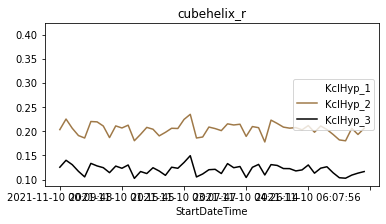

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'flag')

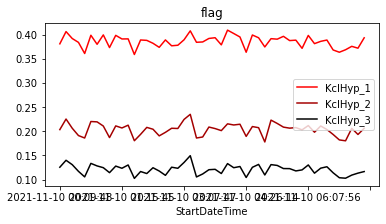

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'flag_r')

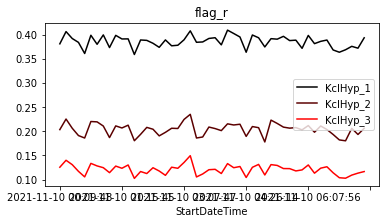

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'flare')

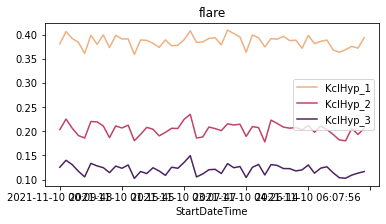

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'flare_r')

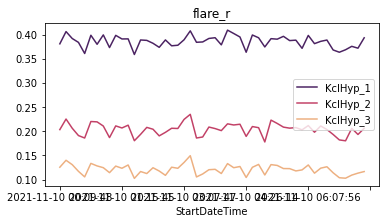

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_earth')

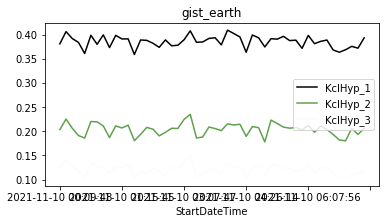

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_earth_r')

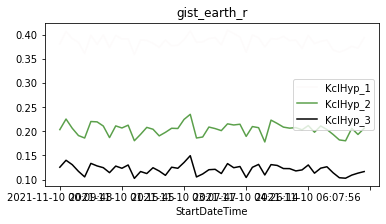

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_gray')

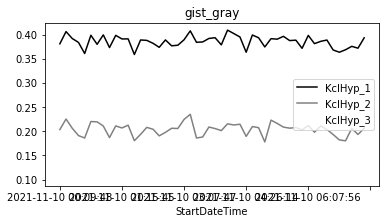

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_gray_r')

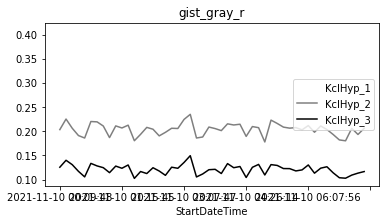

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_heat')

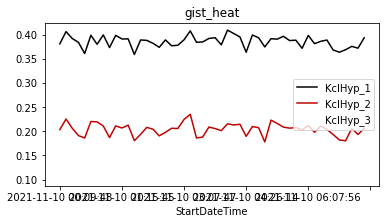

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_heat_r')

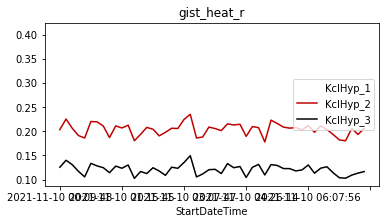

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_ncar')

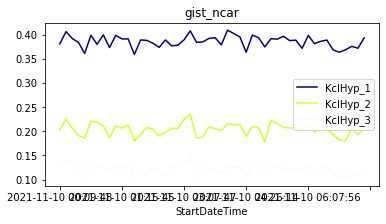

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_ncar_r')

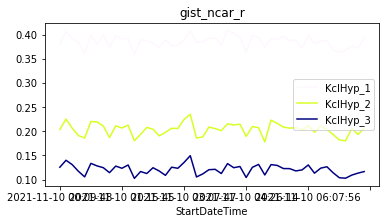

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_rainbow')

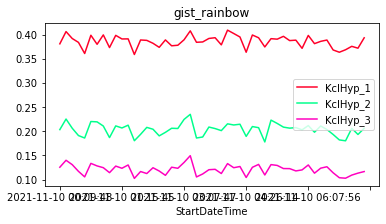

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_rainbow_r')

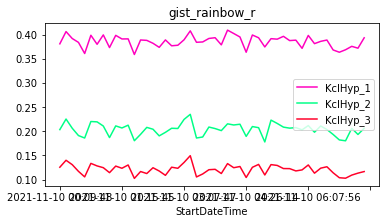

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_stern')

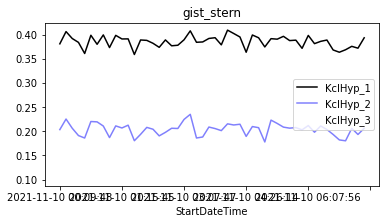

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_stern_r')

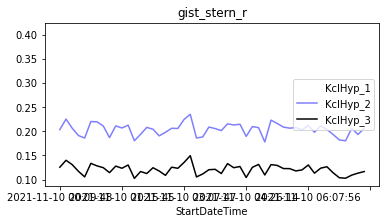

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_yarg')

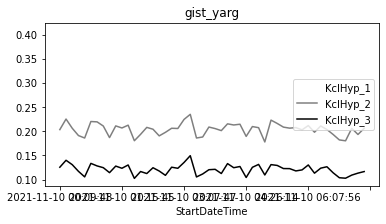

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gist_yarg_r')

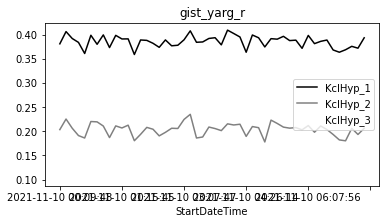

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gnuplot')

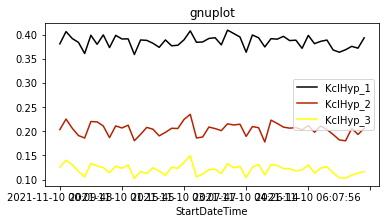

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gnuplot2')

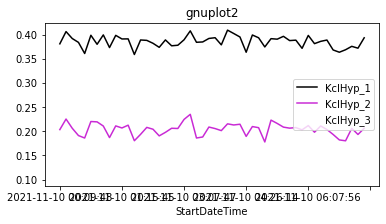

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gnuplot2_r')

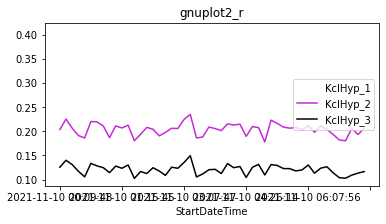

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gnuplot_r')

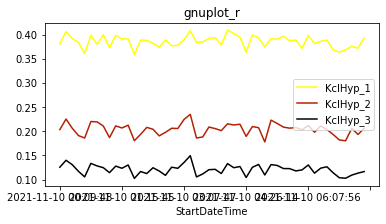

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gray')

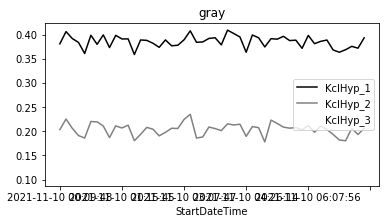

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'gray_r')

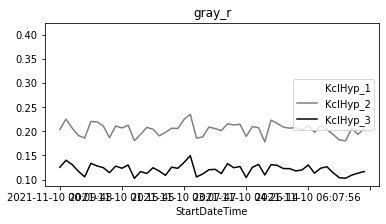

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'hot')

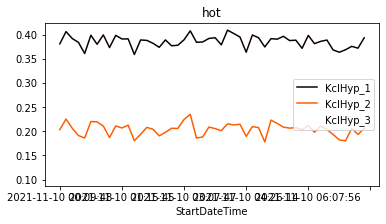

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'hot_r')

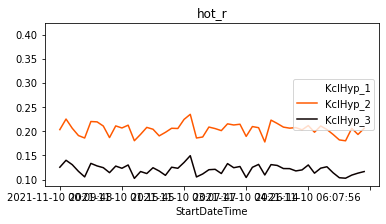

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'hsv')

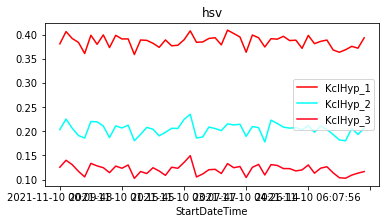

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'hsv_r')

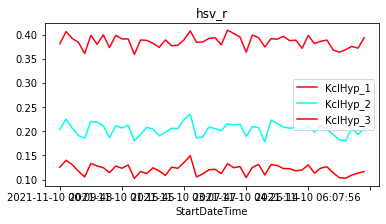

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'icefire')

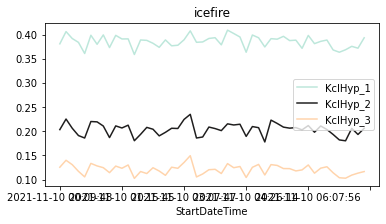

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'icefire_r')

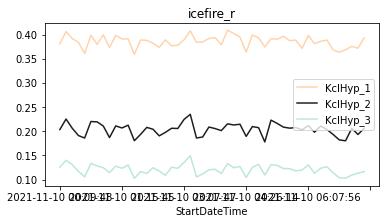

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'inferno')

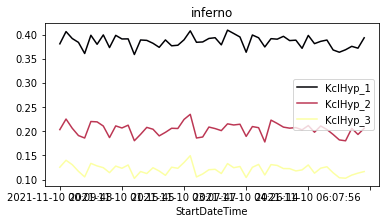

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'inferno_r')

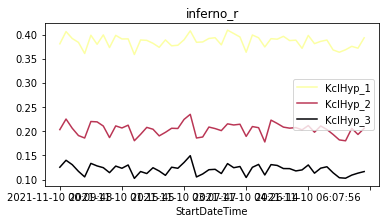

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'jet')

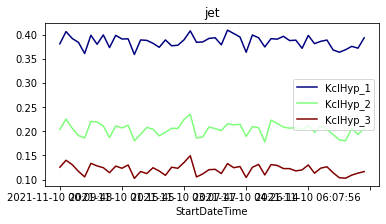

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'jet_r')

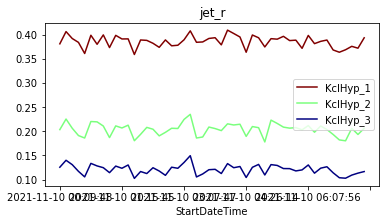

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'magma')

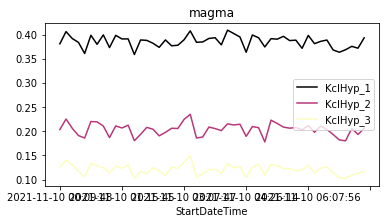

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'magma_r')

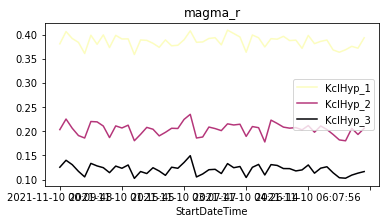

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'mako')

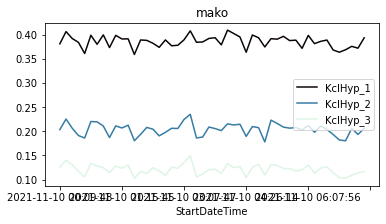

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'mako_r')

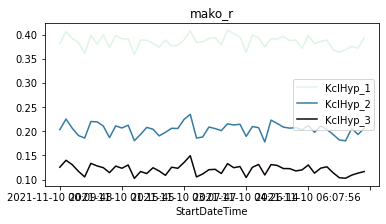

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'nipy_spectral')

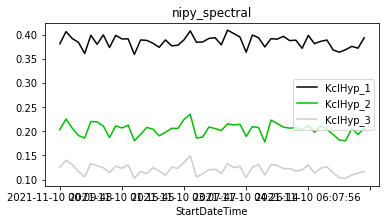

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'nipy_spectral_r')

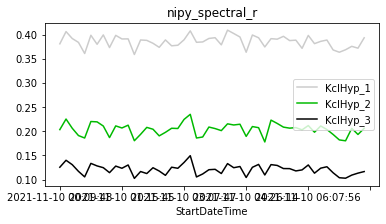

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'ocean')

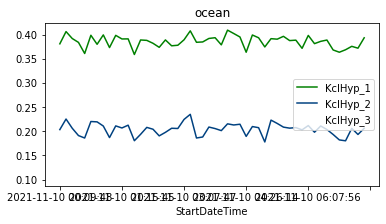

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'ocean_r')

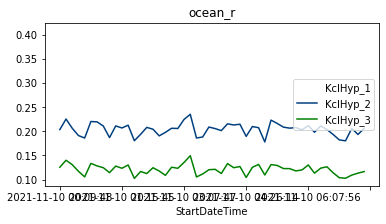

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'pink')

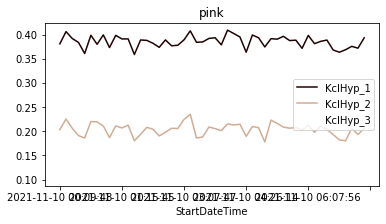

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'pink_r')

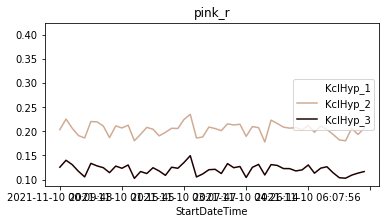

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'plasma')

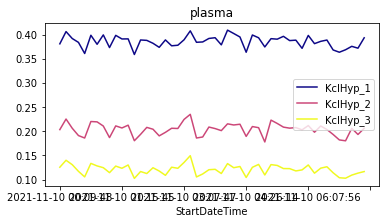

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'plasma_r')

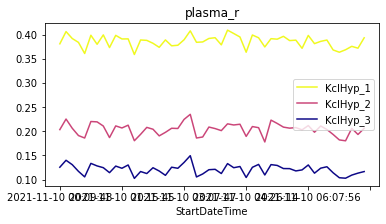

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'prism')

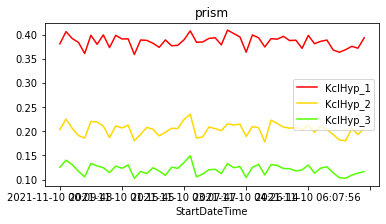

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'prism_r')

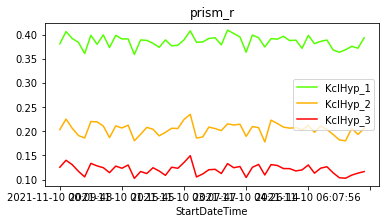

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'rainbow')

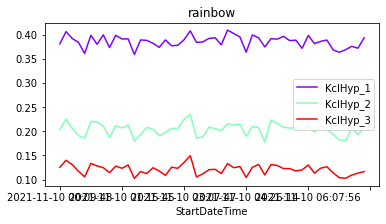

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'rainbow_r')

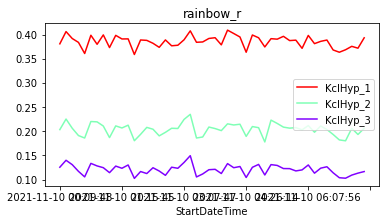

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'rocket')

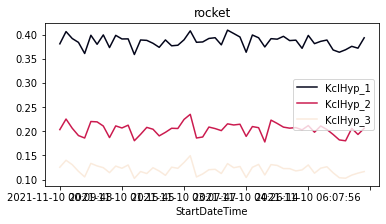

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'rocket_r')

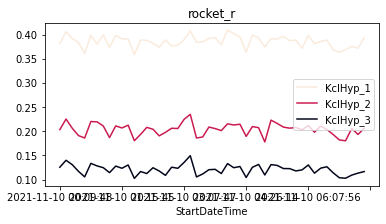

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'seismic')

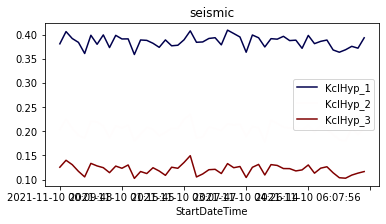

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'seismic_r')

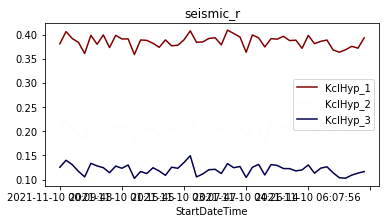

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'spring')

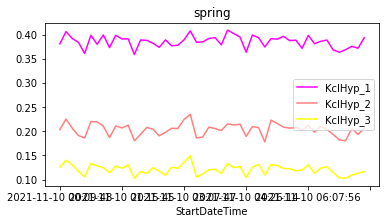

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'spring_r')

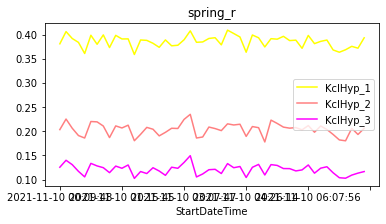

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'summer')

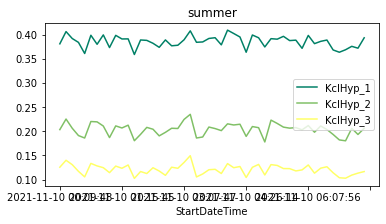

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'summer_r')

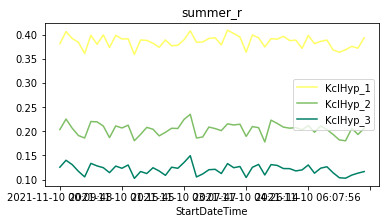

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab10')

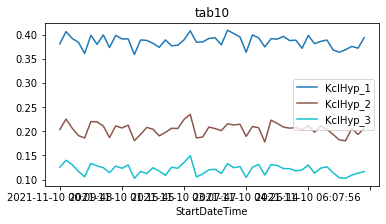

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab10_r')

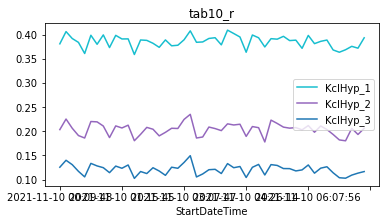

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20')

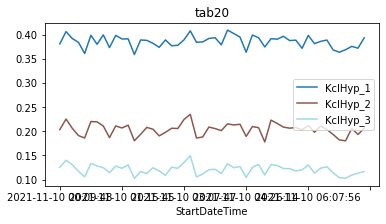

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20_r')

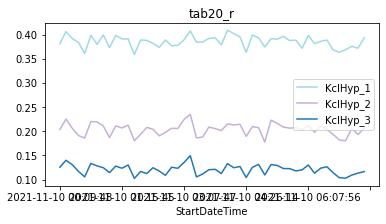

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20b')

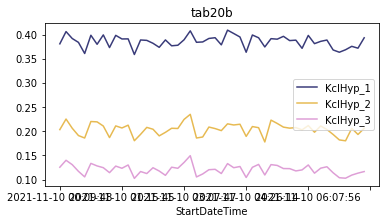

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20b_r')

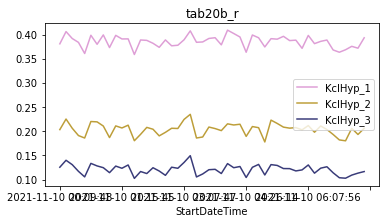

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20c')

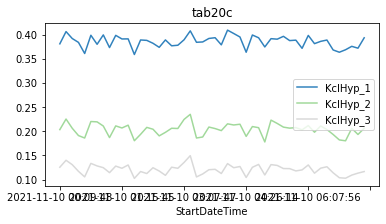

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'tab20c_r')

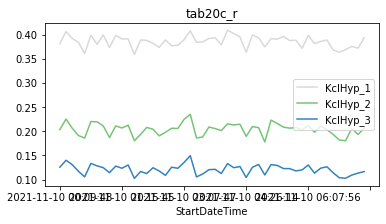

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'terrain')

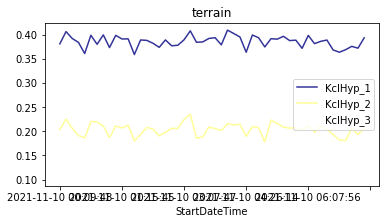

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'terrain_r')

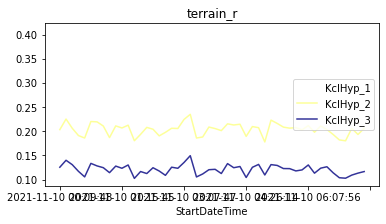

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'turbo')

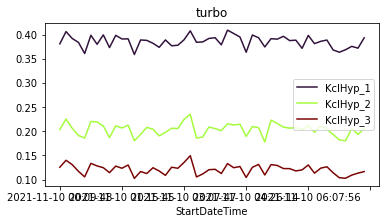

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'turbo_r')

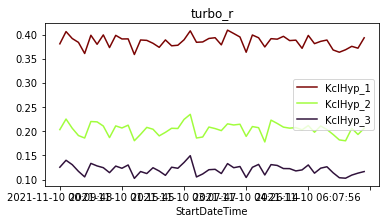

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'twilight')

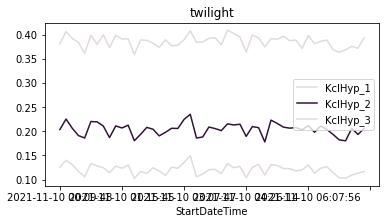

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'twilight_r')

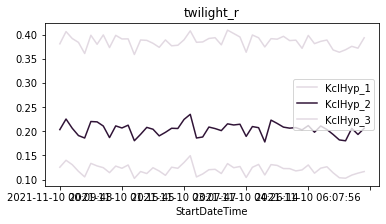

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'twilight_shifted')

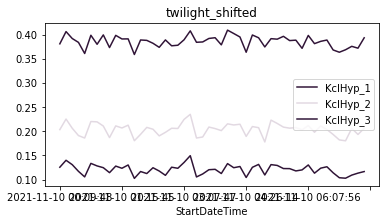

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'twilight_shifted_r')

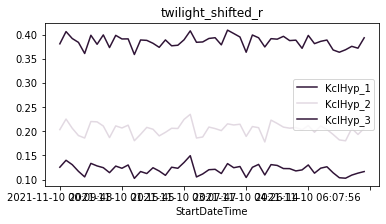

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'viridis')

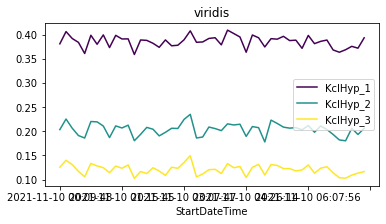

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'viridis_r')

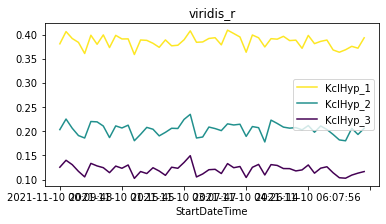

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'vlag')

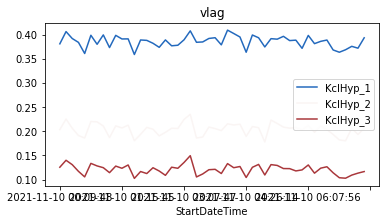

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'vlag_r')

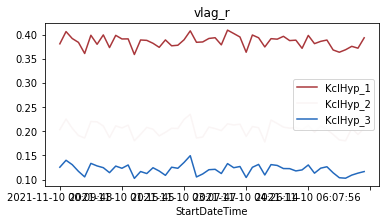

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'winter')

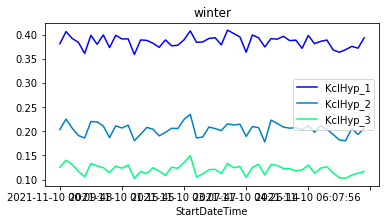

<AxesSubplot:xlabel='StartDateTime'>

Text(0.5, 1.0, 'winter_r')

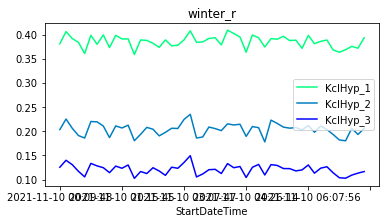

In [235]:
for i,cp in enumerate(cmps):
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot()
    dcmp.plot(colormap=cp,
             ax=ax)
    ax.set_title(cp)
    plt.show()

## fill_between

In [266]:
dfb = dt[['KclHyp_1']].dropna().head(50)
dfb['day'] = pd.to_datetime(dfb.index).strftime("%Y%m%d")
dfb.set_index('day',inplace=True)
df = dfb.reset_index(drop=True)['KclHyp_1']

In [267]:
ma = df.rolling(5).mean()
mstd = df.rolling(5).mean()

<AxesSubplot:>

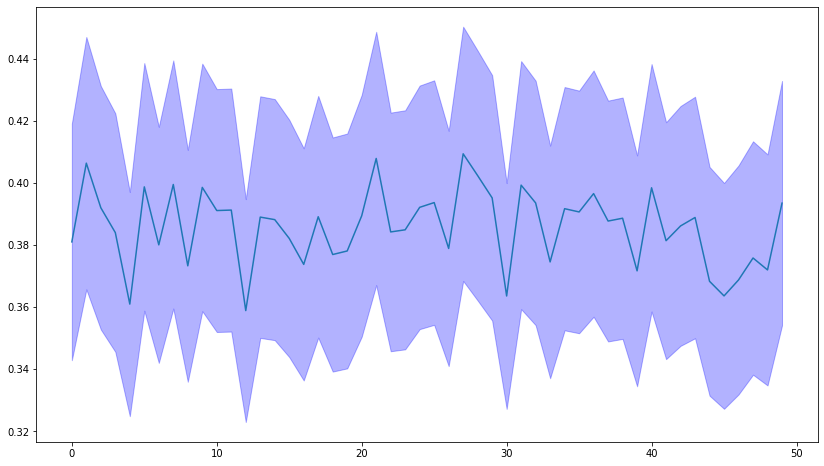

In [275]:
df.plot(figsize=(14,8))
plt.fill_between(mstd.index,df*0.9,df*1.1,color='b',alpha=0.3)